In [1]:
import nltk
nltk.data.path.append('/path/to/your/nltk_data')

In [2]:
pip install --upgrade nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WELFake_Dataset.csv")  # Replace with the correct file name or path

# Display the first few rows
print(df.head())

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


In [7]:
# Check column names
print(df.columns)

# Check for missing values in the 'text' column
print(df['text'].isnull().sum())

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
39


In [8]:
pip install pandas numpy matplotlib seaborn nltk scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hassaniddrisu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassaniddrisu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hassaniddrisu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Load the dataset
df = pd.read_csv("WELFake_Dataset.csv")  # Replace with the correct file name or path

# Display the first few rows
print(df.head())

# Check basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Check the distribution of the target variable
print(df['label'].value_counts())

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null

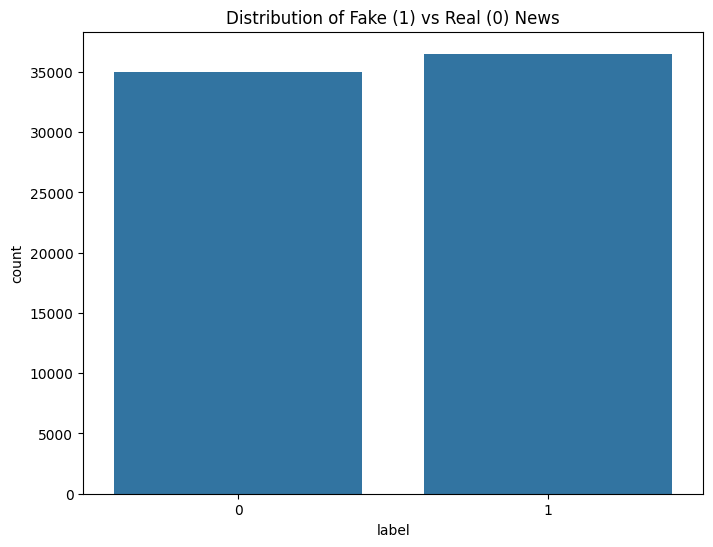

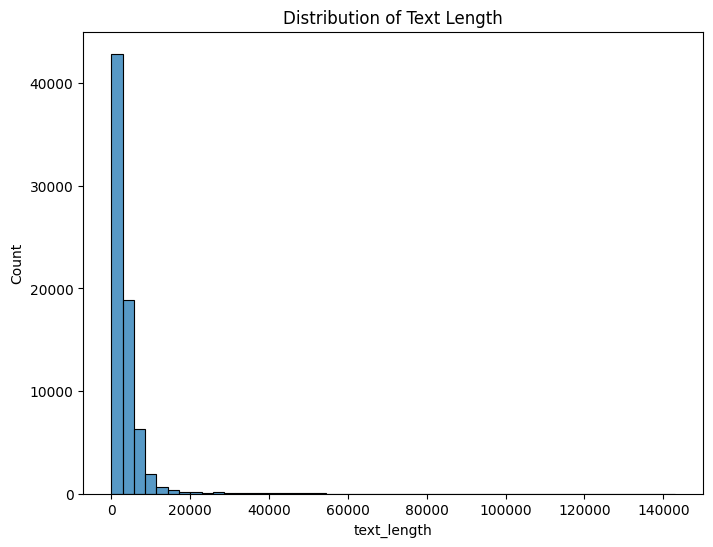

In [12]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title("Distribution of Fake (1) vs Real (0) News")
plt.savefig("label_distribution.png")  # Save the figure
plt.show()

# Analyze text length
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=50)
plt.title("Distribution of Text Length")
plt.savefig("text_length_distribution.png")  # Save the figure
plt.show()

In [14]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity

# Fit and transform the cleaned text
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label']

# Display the shape of the feature matrix
print(X.shape)

(71537, 5000)


In [15]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(X_train.shape, X_test.shape)

(57229, 5000) (14308, 5000)


Accuracy: 0.8489656136427174
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      7081
           1       0.83      0.87      0.85      7227

    accuracy                           0.85     14308
   macro avg       0.85      0.85      0.85     14308
weighted avg       0.85      0.85      0.85     14308



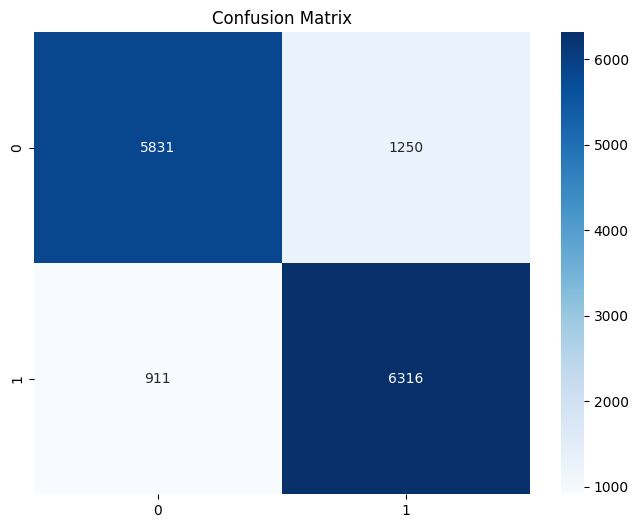

In [16]:
# Initialize and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")  # Save the figure
plt.show()

In [ ]:
with open("classification_report.txt", "w") as f:
    f.write("Accuracy: " + str(accuracy_score(y_test, y_pred)) + "\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))

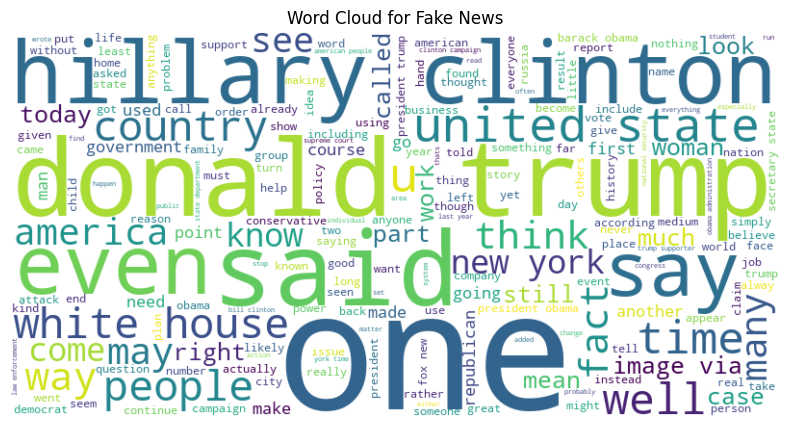

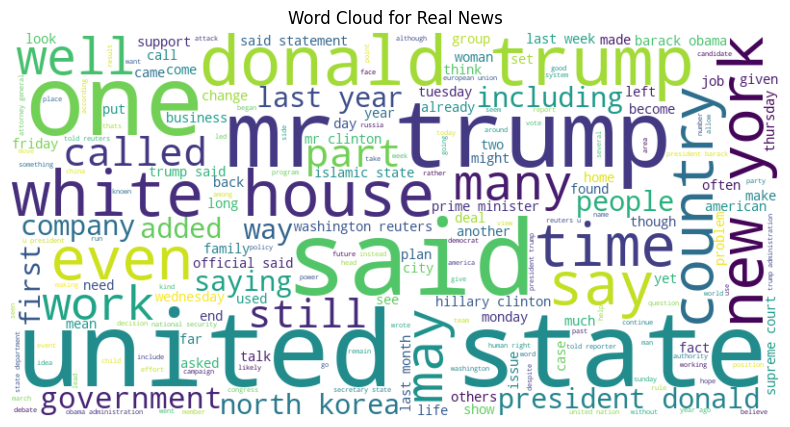

In [18]:
from wordcloud import WordCloud

# Word cloud for fake news
fake_text = " ".join(df[df['label'] == 1]['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake News")
plt.savefig("wordcloud_fake.png")
plt.show()

# Word cloud for real news
real_text = " ".join(df[df['label'] == 0]['cleaned_text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real News")
plt.savefig("wordcloud_real.png")
plt.show()

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [20]:
from wordcloud import WordCloud

print("WordCloud library installed successfully!")

WordCloud library installed successfully!


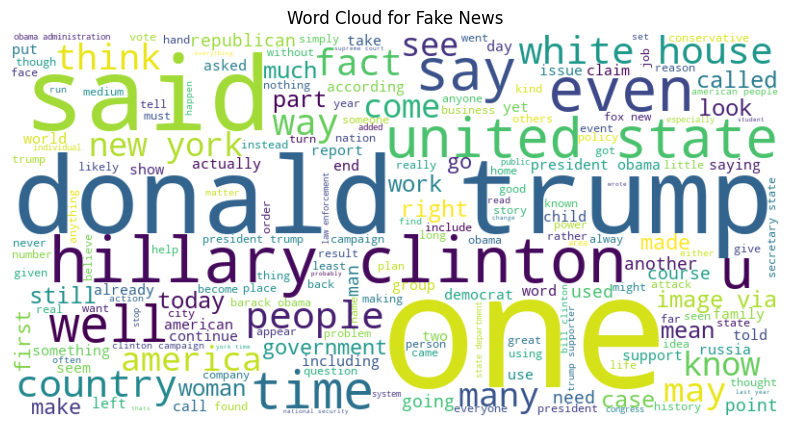

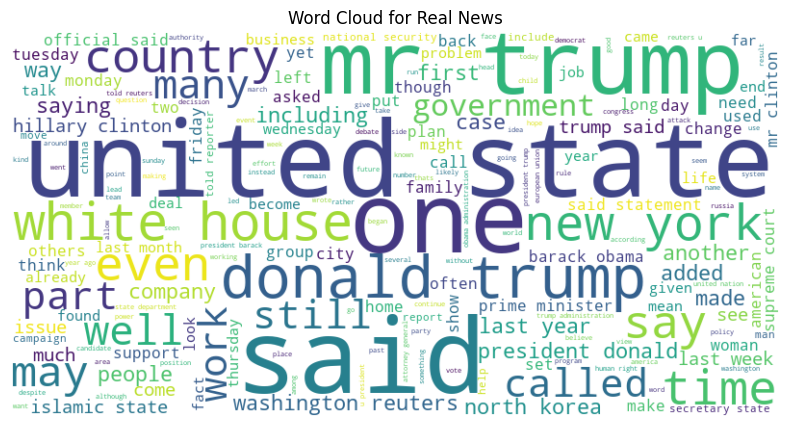

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for fake news
fake_text = " ".join(df[df['label'] == 1]['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake News")
plt.savefig("wordcloud_fake.png")
plt.show()

# Word cloud for real news
real_text = " ".join(df[df['label'] == 0]['cleaned_text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real News")
plt.savefig("wordcloud_real.png")
plt.show()

In [ ]:
# Get the number of samples (rows)
num_samples = len(df)
print("Number of samples:", num_samples)

In [5]:
# Get the class distribution
class_distribution = df['label'].value_counts()
print("Class distribution:\n", class_distribution)

Class distribution:
 label
1    37106
0    35028
Name: count, dtype: int64


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hassaniddrisu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hassaniddrisu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hassaniddrisu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


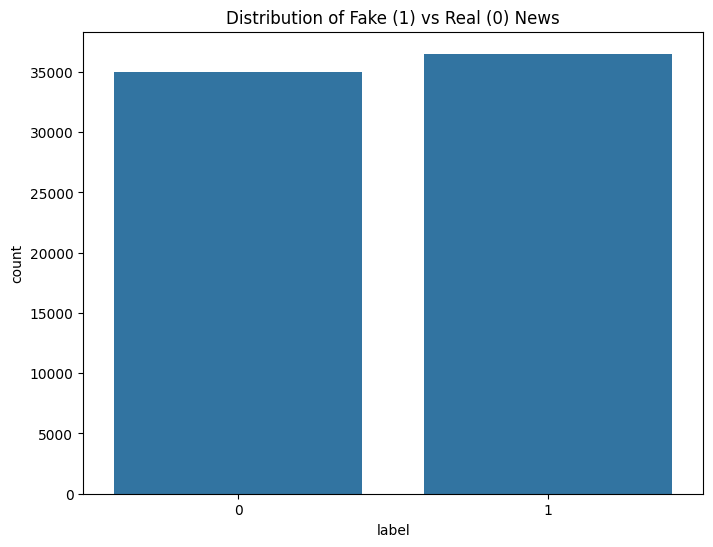

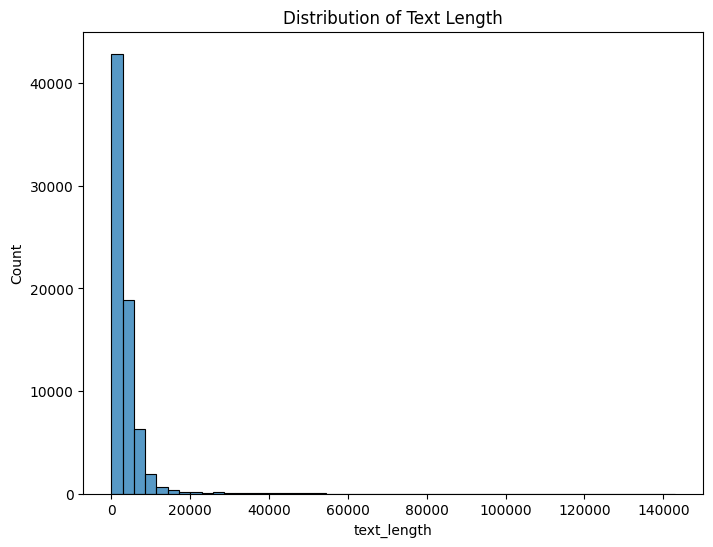

Accuracy: 0.8489656136427174
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      7081
           1       0.83      0.87      0.85      7227

    accuracy                           0.85     14308
   macro avg       0.85      0.85      0.85     14308
weighted avg       0.85      0.85      0.85     14308



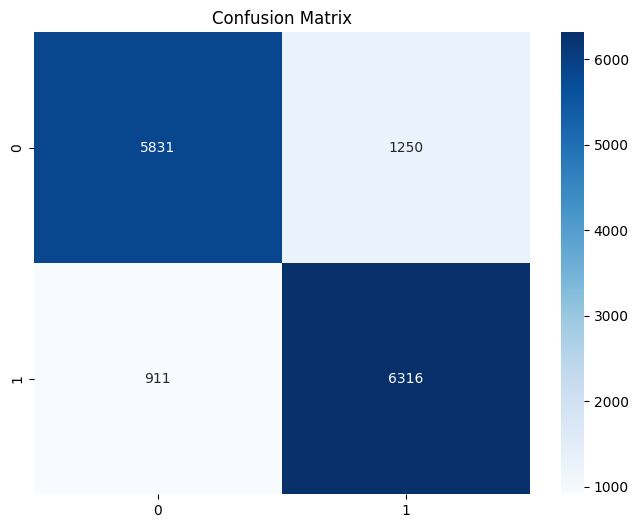

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
df = pd.read_csv("WELFake_Dataset.csv")

# Drop missing values
df = df.dropna()

# EDA: Plot label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title("Distribution of Fake (1) vs Real (0) News")
plt.savefig("label_distribution.png")
plt.show()

# EDA: Plot text length distribution
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df['text_length'], bins=50)
plt.title("Distribution of Text Length")
plt.savefig("text_length_distribution.png")
plt.show()

# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)

# Feature extraction
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

# Save classification report
with open("classification_report.txt", "w") as f:
    f.write("Accuracy: " + str(accuracy_score(y_test, y_pred)) + "\n\n")
    f.write("Classification Report:\n")
    f.write(classification_report(y_test, y_pred))

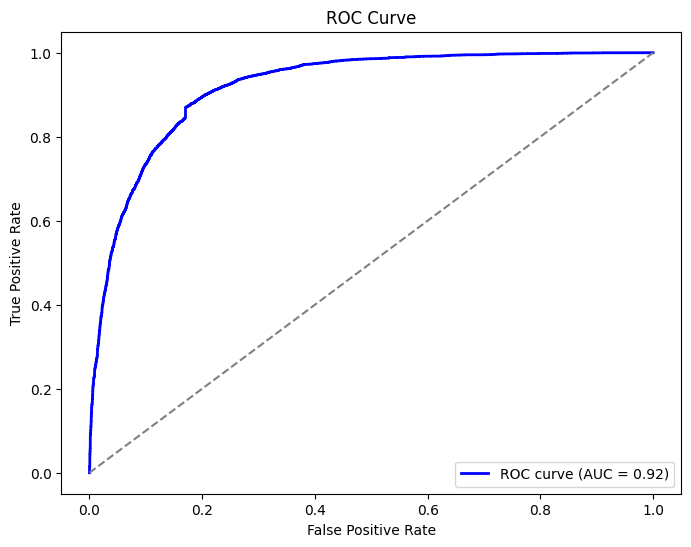

In [9]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig("roc_curve.png")
plt.show()

In [10]:
from sklearn.metrics import classification_report

In [11]:
# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      7081
           1       0.83      0.87      0.85      7227

    accuracy                           0.85     14308
   macro avg       0.85      0.85      0.85     14308
weighted avg       0.85      0.85      0.85     14308



In [12]:
# Save the classification report to a text file
with open("classification_report.txt", "w") as f:
    f.write("Classification Report:\n")
    f.write(report)

In [13]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Save the classification report to a text file
with open("classification_report.txt", "w") as f:
    f.write("Classification Report:\n")
    f.write(report)

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      7081
           1       0.83      0.87      0.85      7227

    accuracy                           0.85     14308
   macro avg       0.85      0.85      0.85     14308
weighted avg       0.85      0.85      0.85     14308

